# 시계열 딥러닝 2-1강~


In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

In [2]:
df=pd.read_csv('london_merged.csv',parse_dates=['timestamp'])
df.head()

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


In [3]:
df.shape #(17414, 10)


(17414, 10)

In [4]:
# df.shape 의 결과: (17414, 10)

# a.ipynb에서는 train:test를 7:3으로 나눴었는데
# 여기에는 17000개를 train ,  414개를 test로 
# 1:2 는 cnt 열을 의미
train =df.iloc[:17000,1:2]
test =df.iloc[17000:17414,1:2]



In [5]:
print(train.shape)
print(test.shape)

(17000, 1)
(414, 1)


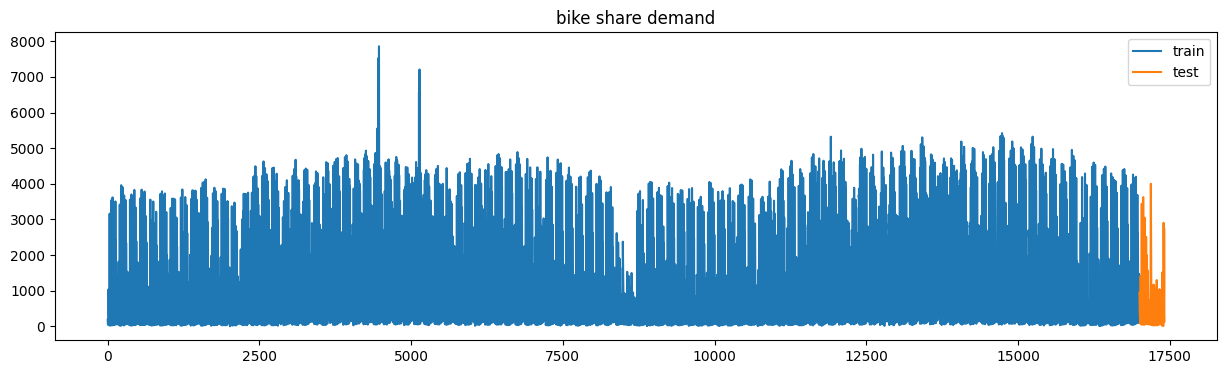

In [6]:
# 17414개에 대한 자전거 이용 cnt 데이터
df['cnt'][:17000].plot(figsize=(15,4),legend=True) # 15*4인치 그래프로 그림
df['cnt'][17000:].plot(figsize=(15,4),legend=True)
# legend: 범례로 각각의 수치가 무엇을 나타내는지 알려줌
plt.legend(['train','test'])
plt.title('bike share demand') 
plt.show()


데이터 패턴을 학습해 예측하는 방법으로 별도의 변수는 필요없지만
자기자신의 한시간전 두식ㄴ전... 몇시간 데이터로 예측을 해는가?
차수를 지정하는 라이브러리라고 설명을 적어놧는데 이게 pacf에 대한 설명인가요?

### <span style="color:red">시계열 분석</span>
### _____________________________________

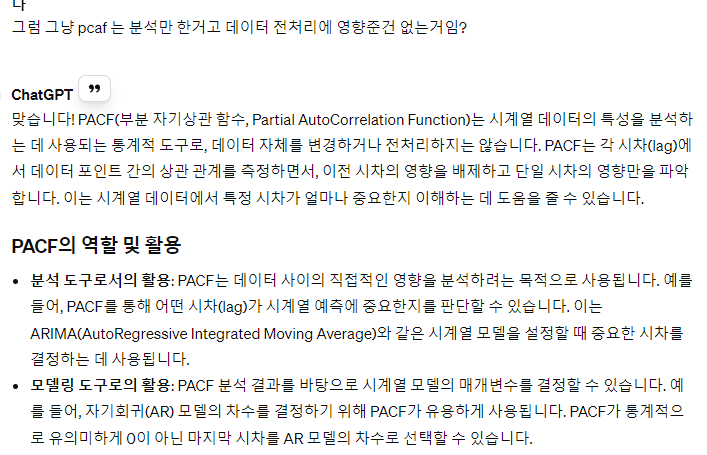
### _____________________________________
### ACF(자기상관함수) 와 PACF(부분자기상관함수)

``` ACF:  단순히 각 시차 간의 전체적인 상관관계를 측정 ``` <BR>
```예를 들어, ACF는 어제의 데이터가 오늘에 미치는 영향을 그제나 사흘 전의 데이터의 영향과 분리하지 않고 전체적으로 측정```<BR><BR><BR>

```PACF 는 어제의 데이터가 오늘에 미치는 영향을 그제나 사흘 전의 데이터의 영향을 제외하고 순수하게 어제만의 독립적 영향을 측정```<BR>
``` 이는 수학적으로 복잡한 계산을 통해 다른 시차의 영향을 제거한 후 어제의 데이터만이 오늘에 미치는 독립적 영향을 알아내는 것을 의미```<BR>

### _____________________________________
###  <span style="color:red">pacf(Partial Autocorrelation Function): 부분자기 상관함수</span>

``` > 시계열 데이터에서 이전의 각 시점이 현재 시점에 미치는 독립적인 영향을 보여줌 ``` <br>
``` > 각 시차가 다른 모든 시차의 영향을 제외하고 얼마나 영향을 미치는지 알려줌 ```
### pacf의 활용
``` >  1. PACF를 계산하고 그래프를 그림  ``` <br>
``` >  2. 만약 3차 시기까지 높은 부분 자기 상관을 보이고 4차 시차부터는 부분 자기 상관이 갑자기 낮아진다면 이는 3차 시차까지의 데이터만이 현재 데이터 포인트에 유의미한 독립적 영향을 미친다는걸 의미```

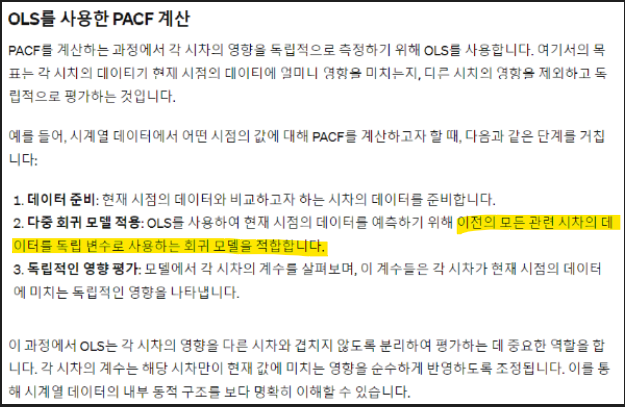<br>
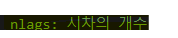<br>
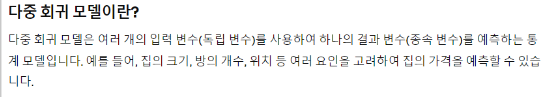

In [7]:
from statsmodels.tsa.stattools import pacf

# 자전거 이용 고객 데이터(CNT는 고객수의 해당하는 칼럼) 17000여개가 
# 시간에 따라 나열되있으므로 시계열 데이터가 맞음


# 1. df['cnt']: 분석하려는 시계열 데이터
# 2. nlags: 시차의 개수 | PACF를 계산할때 고려할 최대 시차수를 20으로 설정
   ## 자전거 데이터의 경우 시간 단위이므로 20시간 시차를 고려하겠다는 것으로 해석(?)됌
   ## 시계열이 아닌 경우:  nlags=20은 단순히 '이전 20개 데이터 포인트'까지의 관계를 고려하겠다는 의미가 됌

# 3. ols(Ordinary Least Squares):일반 최소 제곱법
   ## 회귀 분석에서 가장 기본적이고 널리 사용되는 방법
   ## 하나이상의 독립변수와 종속변수 사이의 관계를 모델링 할때, 
   ## 관측된 데이터와 모델 예측 사이의 제곱 오차의 합을 최소화하는 파라미터를 찾아냄


pacf = pacf(df['cnt'], nlags=20, method='ols')
print(pacf)


[ 1.          0.78148357 -0.41172684  0.18486682 -0.07510114 -0.09947694
 -0.08494917 -0.00403993  0.0920456   0.07065422 -0.32935188 -0.06873344
  0.05112775  0.04852911  0.06695059 -0.19621297 -0.07610221  0.14365297
 -0.11638129  0.18990804  0.16480713]


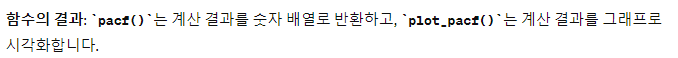
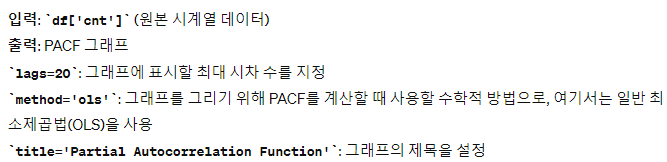

C:\Users\CONET-22\AppData\Local\Temp\ipykernel_1248\1906983560.py:4: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  plot_pacf(df['cnt'], lags=20, method='ols', title='Partial Autocorrelation Function').show()


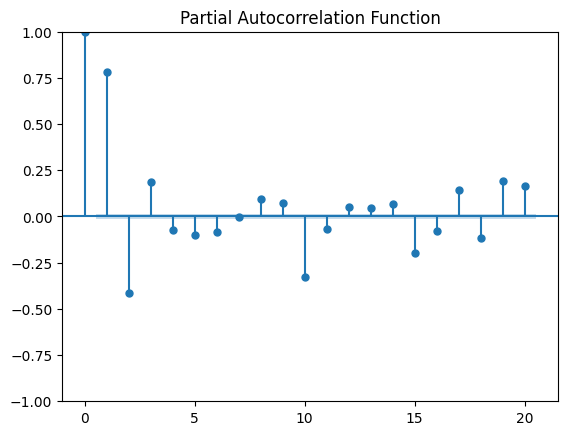

In [8]:
from statsmodels.graphics.tsaplots import plot_pacf

# cnt열의 부분자기상관함수를 계산하고 그래프로 그리는 지시 - 시각화
plot_pacf(df['cnt'], lags=20, method='ols', title='Partial Autocorrelation Function').show()



# plot_pacf(pacf, lags=20, method='ols', title='Partial Autocorrelation Function').show()

### <span style="color:red">MinMaxScaler</span>
``` 1. 서로 다른 변수의 값 범위를 일정한 수준으로 맞추는 작업 ```


##### 강의에선  1시간전 데이터를 독립변수로 해서 다음 데이터를 예측하는 방법 사용

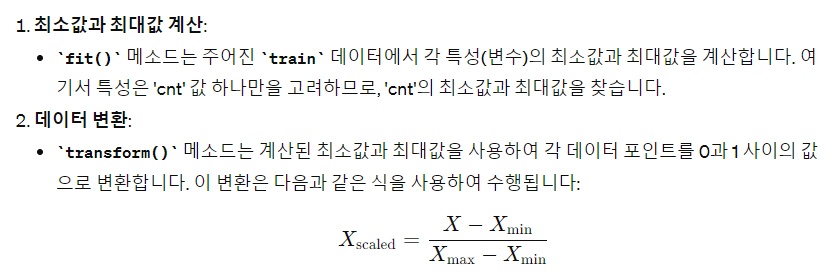

In [9]:
from sklearn.preprocessing import MinMaxScaler

sc=MinMaxScaler(feature_range=(0,1)) # 데이터를 0과 1 사이의 값으로 스케일링하겠다는 의미
train_scaled =sc.fit_transform(train) # train: cnt의 17000번 데이터까지 담긴 변수


# fit():17000개 데이터중 train에 대해 최소값과 최대값을 계산합니다.
# transform(): 계산된 최소값과 최대값을 사용하여 데이터를 0과 1 사이로 변환합니다. 


In [10]:

train_scaled # 배열값인 array로 결과값 나옴
train_scaled.shape

(17000, 1)

### 자기 자신의 과거를 독립변수로 하기 때문에  
### train 데이터를 한시간 단위로 옆으로 shift시켜  그 데이터를 독립변수로 사용

In [11]:
x_train=[]
y_train=[]

# train_scaled.shape 의 결과가 (17000, 1)로 train_scaled[n:0]뒤에 0은 사실상 특별한 의미는 없음
for i in range(1,17000):
    # train 데이터를 MinMaxScaler 적용시킨 train_scaled

    x_train.append(train_scaled[i-1:i,0]) # 데이터 1개전 shift된값을 x_train(독립변수)   #  여기선 1시간 단위의 데이터가 기록되어 있으므로 1시간 전 데이터라고 해석 가능
    y_train.append(train_scaled[i,0]) # 일반적 데이터 y에 (종속변수)

# x_train, y_train: 리스트 -> np array 형태로 바꾸는거임
x_train,y_train=np.array(x_train),np.array(y_train)




In [12]:
## 시계열은 3차원의 데이터를 필요로함
x_train.shape #(16999, 1)로 2차원 데이터임

# 3차원 데이터로 변경
x_train=np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))

x_train.shape #(16999, 1, 1)

# 전처리 완료(정리하자면)
##### 17000개 cnt 데이터를 MinMaxScaler로 0과 1 사이 데이터로 바꿔서
##### 시계열 데이터 처리를 위한 3차원 형태 .reshape으로 바꿈

(16999, 1, 1)

# 2-5 강  - 딥러닝 RNN

### RNN
```1. 딥러닝과 조금 다름``` <BR>
```2. 과거의 입력값을 네트워크에 저장시켜서 출력에 영향을 미침```



In [13]:
# Keras API가 TensorFlow 내부에 통합되어 인강과 작성법 변경
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN, Activation


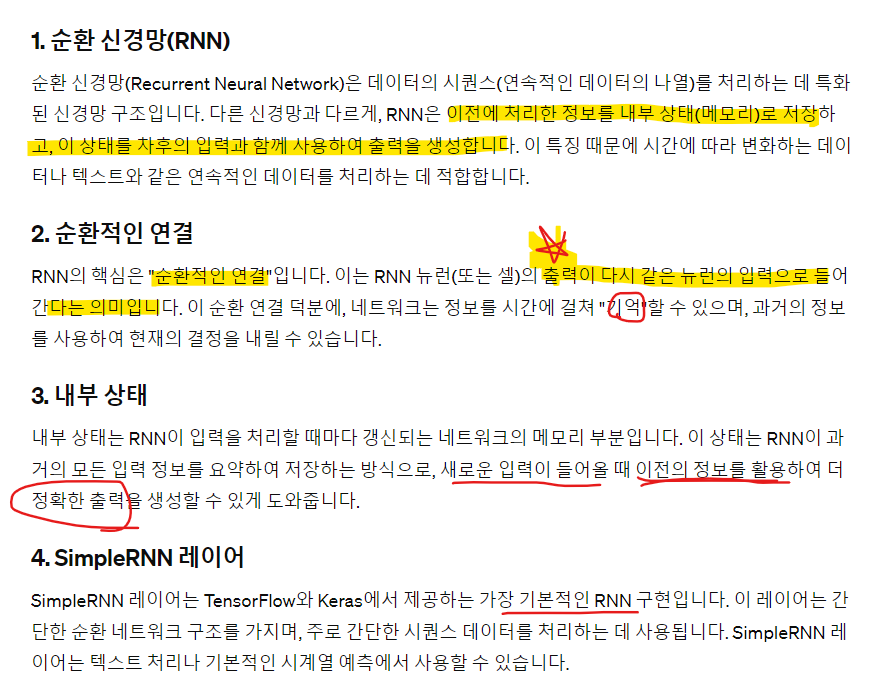

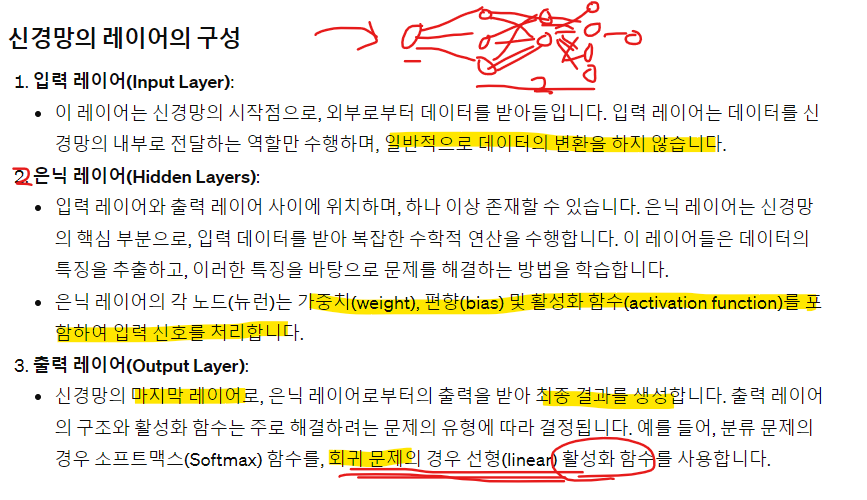

## <span style="color:red">활성화함수</span>
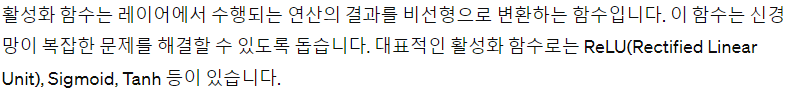
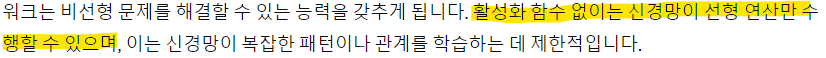

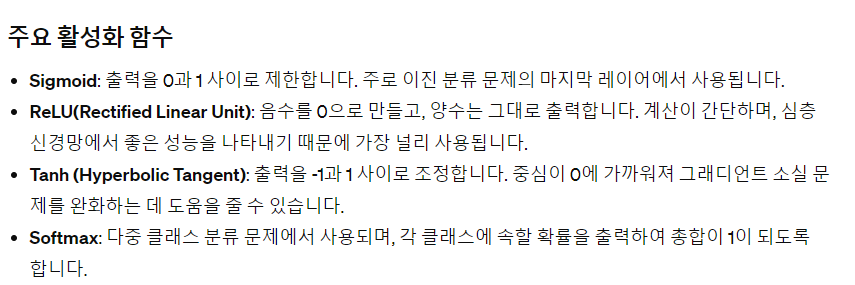

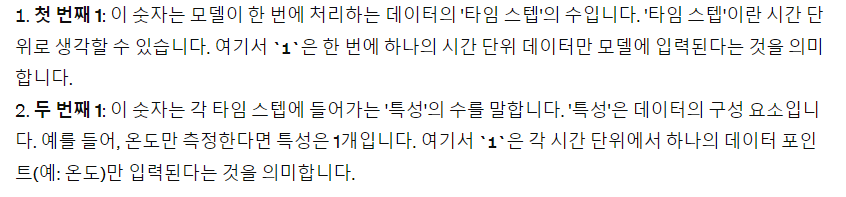

## <span style="color:red">Dense 레이어</span>


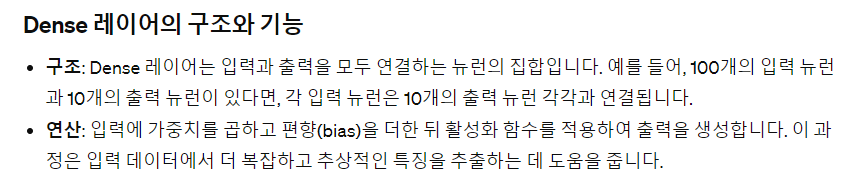

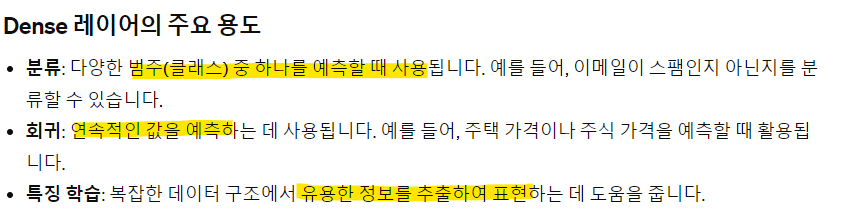

In [14]:

rnn=Sequential() # 레이어를 선형으로 쌓는 간단한 방법을 제공
# 입->출력으로 데이터가 순차적으로 흐르는 모델을 쉽게 만들수 있게 해줌


# SimpleRNN: 기본적인 rnn레이어로 순차적인 연결 포함
# relu라는 활성함수를 사용
# units=6 -> 뉴런의 개수를 6개로 (출력차원이 6이된다?)
  ## layer과 units의 관계
     ### 1. layer: 입력 데이터를 받아 처리하고 출력을 다음 레이어로 전달하는 데이터 처리 모듈
     ### 2. units: 뉴런과 같은 의미로 레이어 안에 있는 뉴런, 해당 레이어가 수행할수 있는 계산의 기본단위

# input_shape: 여기선 RNN 모델에 데이터가 어떻게 들어오는지를 설명
 ##  input(타임스텝수, 특성수) 
   ## 1. 타임스텝스: 각 입력 시퀀스에 포함될 연속적인 데이터 포인트의 수(대부분의 경우, 특히 시계열 데이터를 한 번에 한 단계씩 처리할 때는 이 값을 1로 설정)
   ## 2. 특성수: 영향을 미치는 특성 > 예를들어 여기선 시간에 대한 자전거 이용수 이므로 특성이 1이지만 | 온도,습도,시간같은 특성이 많아지면 3같이 둘수 있다
rnn.add(SimpleRNN(activation='relu',units=6,input_shape=(1,1)))



# Dense레이어 
# 1. activation: 입력받은 값을 그대로 출력함을 의미: 회귀문제에서 주로 1 사용 (마지막 출력일때 이 활성화 함수 사용)
# 2. units=1:  레이어가 가질 출력유닛(뉴런)의 수를 정의 -> 보통 최종 예측값 하나를 출력하기 위해 사용
rnn.add(Dense(activation='linear',units=1)) 

print(rnn.summary())


c:\Users\CONET-22\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)          │ (None, 6)              │            48 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │             7 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 55 (220.00 B)

 Trainable params: 55 (220.00 B)

 Non-trainable params: 0 (0.00 B)

None


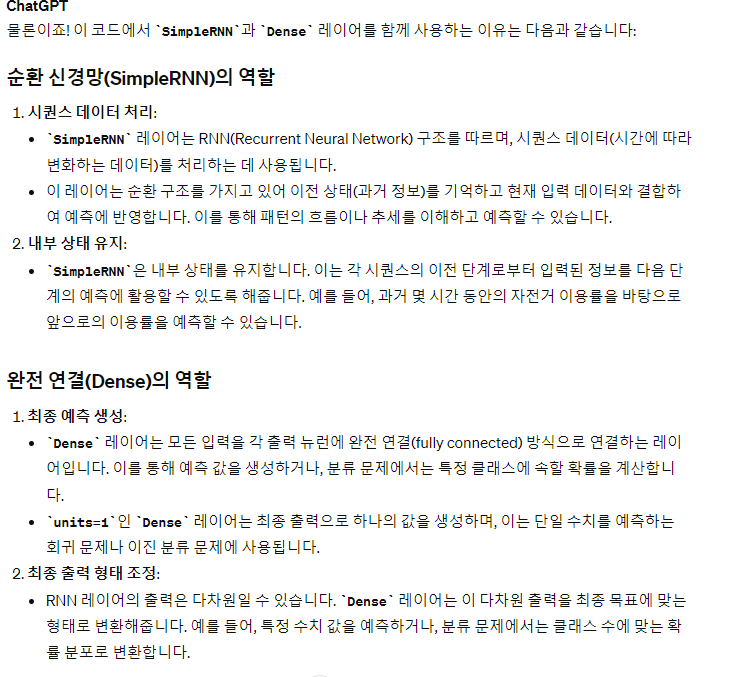

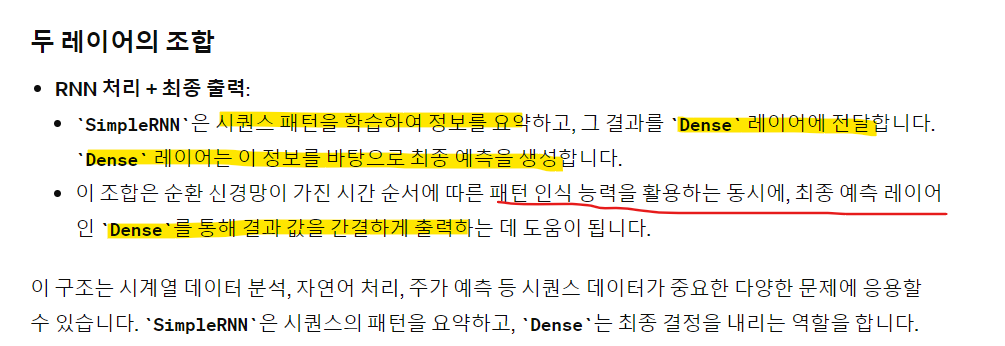

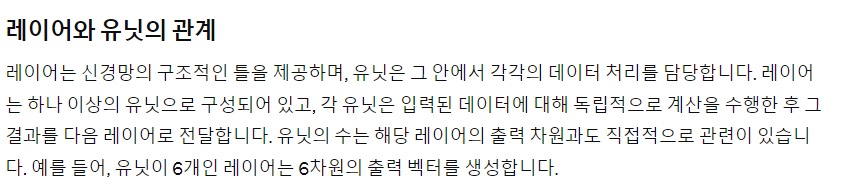

In [15]:
# 순환 신경망 모델 학습 전에 모델을 설정하는 단계
# mse: Mean Squared Error'의 약자로, 예측값과 실제값의 차이를 제곱하여 평균낸 것
#   =>값이 작을수록 모델의 성능이 좋다고 평가됩니다.

# metrics=['mse']: 학습 및 테스트 단계에서 모델을 평가하기 위한 지표를 지정
# 이 지표를 통해 모델의 성능을 모니터링할 수 있음

# 'adam' 최적화기는 이 손실을 효과적으로 최소화하기 위해 모델의 가중치를 조정


#SimpleRNN으로 학습시키기
rnn.compile(loss='mse',optimizer='adam',metrics=['mse'])


In [16]:
# x_train: 자전거 이용객의 1시간 전으로 shift된 데이터 (독립변수)
# y_train : 원래데이터
rnn.fit(x_train,y_train,batch_size=1,epochs=2)

Epoch 1/2
16999/16999 ━━━━━━━━━━━━━━━━━━━━ 14s 783us/step - loss: 0.0080 - mse: 0.0080
Epoch 2/2
16999/16999 ━━━━━━━━━━━━━━━━━━━━ 13s 790us/step - loss: 0.0076 - mse: 0.0076


In [18]:
inputs=sc.transform(test)
inputs.shape  #(414, 1) 행렬 개수


(414, 1)

In [ ]:
# 테스트용 데이터 x_test도  1시간 전으로 shift(독립변수) 시킨후 3차원 배열로 형태 변경
x_test=[]
for i in range(1,415):
    x_test.append(inputs[i-1:i,0])
x_test=np.array(x_test)
x_test=np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))
x_test.shape

(414, 1, 1)

In [ ]:
# 3차원으로 바꿔준 데이터를 rnn에다 예측을 해서 대입을 해주고
rnn=rnn.predict(x_test)
# 0에서 1로 >MinMaxScaler< 스케일을 작업햇는데 이를 다시 원래값으로 돌려서 rnn으로 넣음
rnn=sc.inverse_transform(rnn)

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step


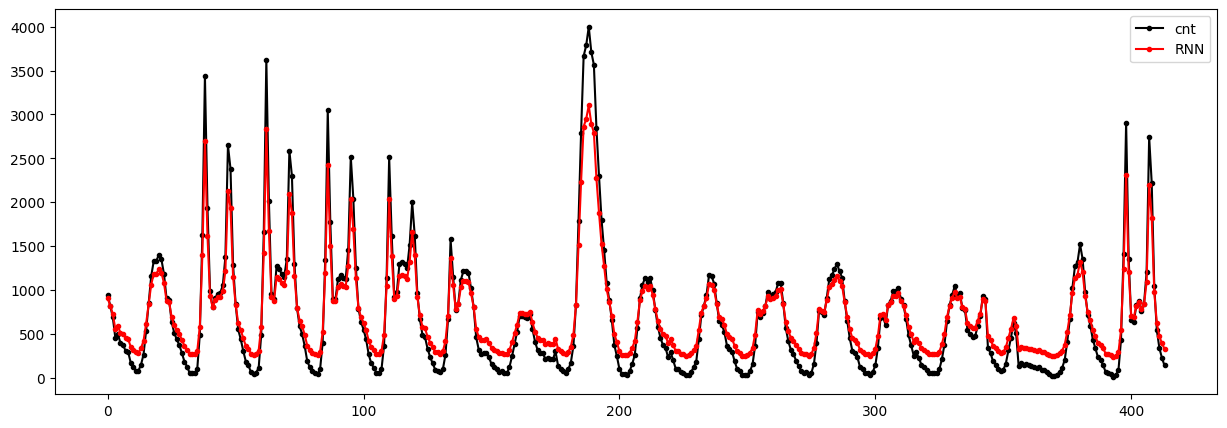

In [ ]:
# test는 df.iloc[17000:17414,1:2]

test=np.array(test) 

plt.figure(figsize=(15,5))
plt.plot(test,marker='.',label='cnt',color='black') # 실제데이터 그래프
plt.plot(rnn,marker='.',label='RNN',color='red') # 예측 그래프
plt.legend()


![image-2.png](attachment:image-2.png)

# 2-6 강  LSTM

### LSTM
``` 1. RNN 모양으로 구축을 하면 시간의 흐름에 따라 입력된 정보의 값이 소멸되는 vanishing gradient" 문제``` <BR>
``` 2. 메모리 블록: 기억을 장기적으로 할수 있도록 하여 RNN에 단점을 극복```


In [ ]:
from tensorflow.keras.layers import LSTM

lstm=Sequential()
lstm.add(LSTM(units=6,activation='relu',input_shape=(1,1)))
lstm.add(Dense(units=1,activation='linear'))


c:\Users\CONET-22\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)



### <span style="color:red">rnn과 lstm summary의 차이.</span>

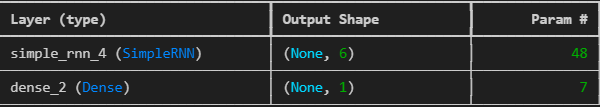 # rnn<br>
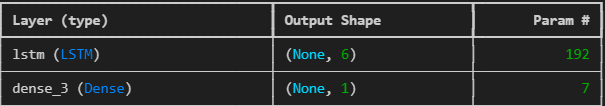  #lstm


``` 1. units의 수는 똑같이 6을 주었지만  param의 수는 각각 48(RNN)과  192(LSTM)이다``` <BR>
``` 2. 이것이 의미하는 바는 좀더 정교하게 학습하는 여건이 된다는 것임``` <BR>
``` 3. 반대로 과적합(오버피팅)이 될수 있다``` <BR>



In [ ]:
print(lstm.summary())



Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_3 (LSTM)                   │ (None, 6)              │           192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 1)              │             7 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 199 (796.00 B)

 Trainable params: 199 (796.00 B)

 Non-trainable params: 0 (0.00 B)

None


In [ ]:

#  lstm 모델로 학습시키기
lstm.compile(loss='mse',optimizer='adam',metrics=['mse'])
lstm.fit(x_train,y_train,batch_size=1,epochs=2) # epochs: 전체데이터를 2번학습해줘
# 돌리는 동안 loss가 적어지는걸 볼수 있음

Epoch 1/2
16999/16999 ━━━━━━━━━━━━━━━━━━━━ 15s 815us/step - loss: 0.0086 - mse: 0.0086
Epoch 2/2
16999/16999 ━━━━━━━━━━━━━━━━━━━━ 15s 859us/step - loss: 0.0069 - mse: 0.0069


In [ ]:

# 학습된 모형으로 예측을 또 했고
lstm=lstm.predict(x_test)
# 스케일링(0,1사이 값이엿던거) 다시 원본값으로 바꿈 
lstm=sc.inverse_transform(lstm)

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


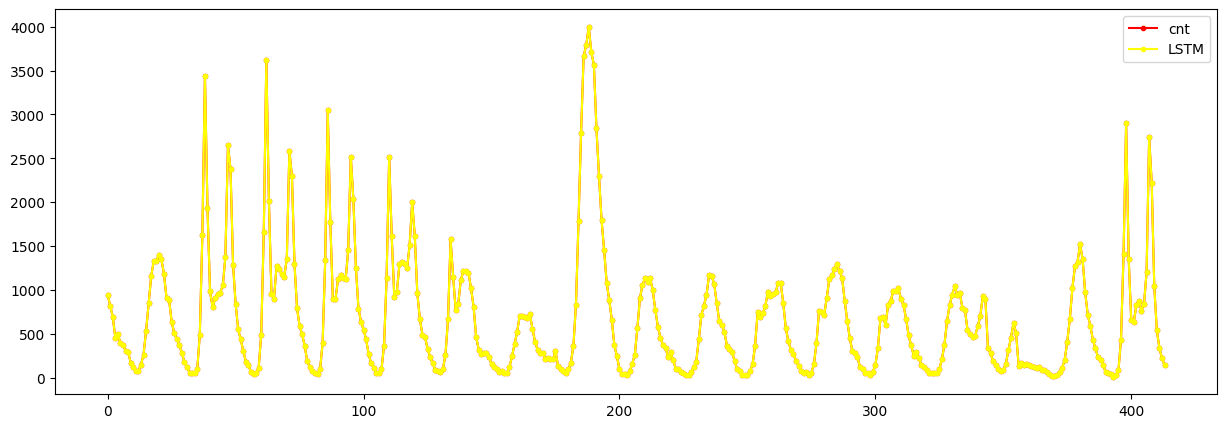

In [ ]:

plt.figure(figsize=(15,5))
plt.plot(test,marker='.',label='cnt',color='red')
plt.plot(test,marker='.',label='LSTM',color='yellow')
plt.legend()


# 2-7 GRU

### GRU
``` 1.LSTM의 오버피팅 문제 해결```

In [ ]:
from tensorflow.keras.layers import GRU

gru=Sequential()
gru.add(GRU(units=6,activation='relu',input_shape=(1,1)))
gru.add(Dense(units=1,activation='linear'))

c:\Users\CONET-22\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
print(gru.summary())

Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gru_3 (GRU)                     │ (None, 6)              │           162 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 1)              │             7 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 169 (676.00 B)

 Trainable params: 169 (676.00 B)

 Non-trainable params: 0 (0.00 B)

None


In [ ]:

gru.compile(loss='mse',optimizer='adam',metrics=['mse'])
gru.fit(x_train,y_train,batch_size=1,epochs=2)

Epoch 1/2
16999/16999 ━━━━━━━━━━━━━━━━━━━━ 17s 920us/step - loss: 0.0099 - mse: 0.0099
Epoch 2/2
 6623/16999 ━━━━━━━━━━━━━━━━━━━━ 9s 895us/step - loss: 0.0066 - mse: 0.0066

KeyboardInterrupt: 

In [ ]:
gru=Sequential()
gru.add(GRU(units=6,activation='relu',input_shape=(1,1)))
gru.add(Dense(units=1,activation='linear'))
gru.compile(loss='mse',optimizer='adam',metrics=['mse'])
gru.fit(x_train,y_train,batch_size=1,epochs=2)
gru= gru.predict(x_test)
gru=sc.inverse_transform(gru)

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


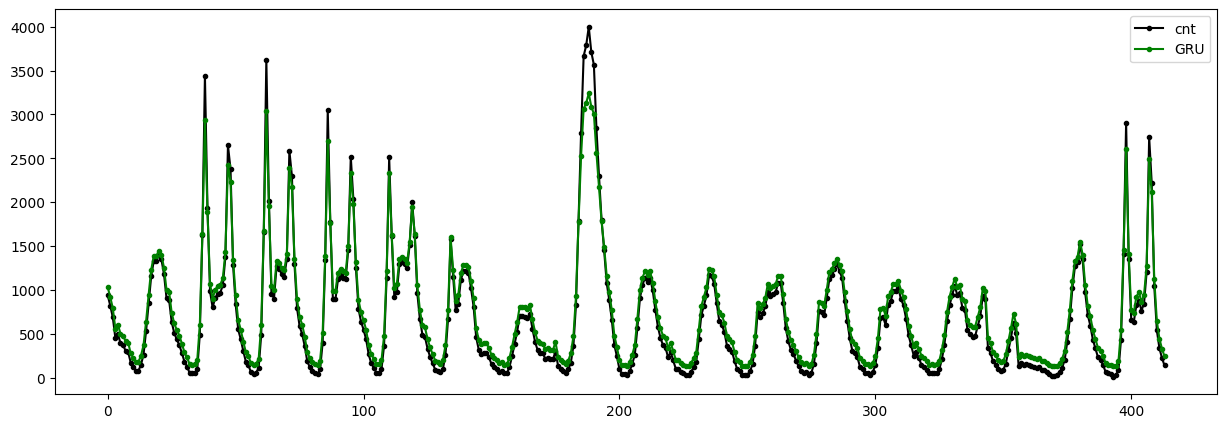

In [ ]:
plt.figure(figsize=(15,5))
plt.plot(test,marker='.',label='cnt',color='black')
plt.plot(gru,marker='.',label='GRU',color='green')
plt.legend()


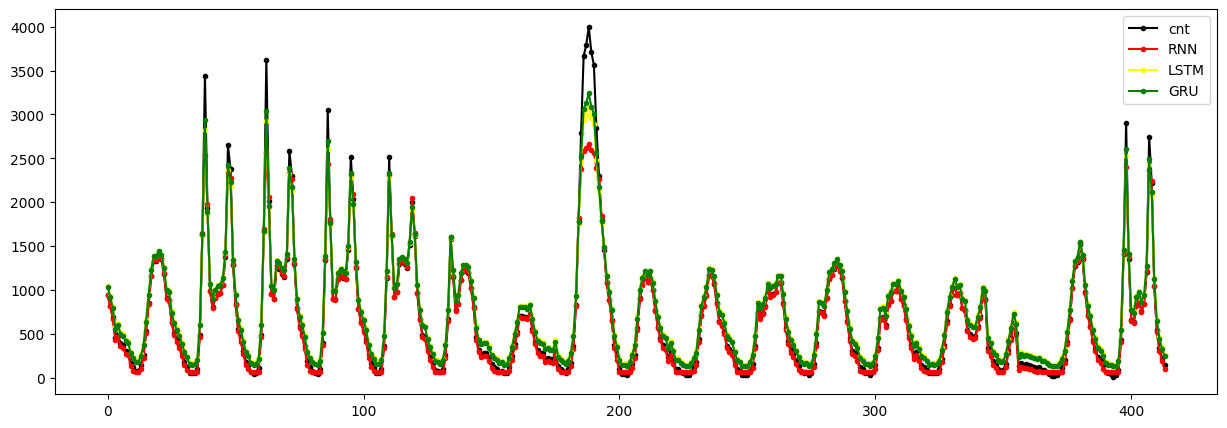

In [ ]:
plt.figure(figsize=(15,5))
plt.plot(test,marker='.',label='cnt',color='black')
plt.plot(rnn,marker='.',label='RNN',color='red')
plt.plot(lstm,marker='.',label='LSTM',color='yellow')
plt.plot(gru,marker='.',label='GRU',color='green')
plt.legend()

# 이 경우 LSTM의 피팅이 가장 좋음



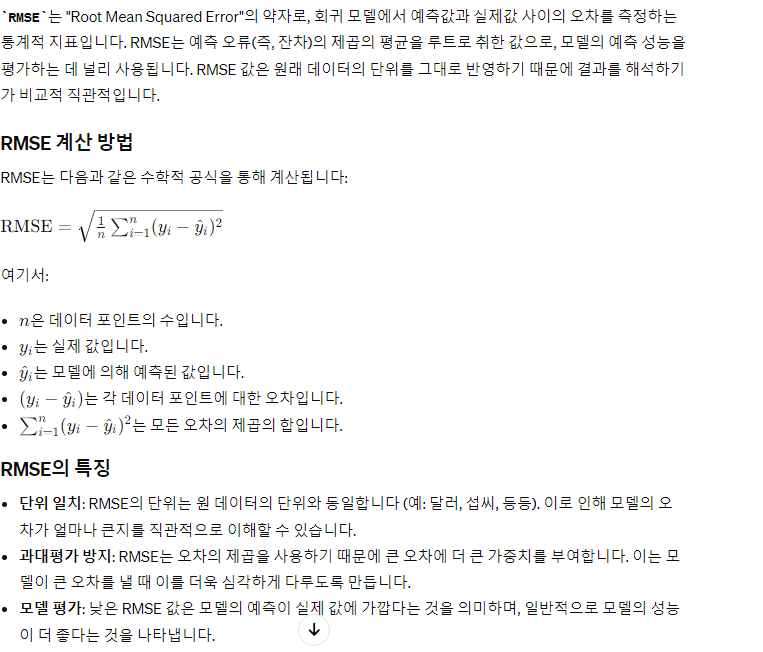

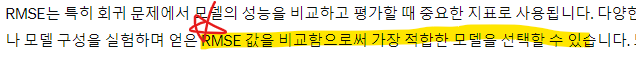

In [ ]:
from sklearn.metrics import mean_squared_error


# RMSE 값을 비교하여 가장 적합한 모델을 선택가능하다
def RMSE(y_test, y_predict):
    return np.sqrt(mean_squared_error(y_test,y_predict))


In [ ]:
 
print("RNN RMSE",RMSE(test,rnn))

RNN RMSE 156.4684265271216


In [ ]:
print("LSTM RMSE",RMSE(test,lstm))


LSTM RMSE 153.54544642955688


In [ ]:
print("GRU RMSE",RMSE(test,gru))


GRU RMSE 130.30279287688694


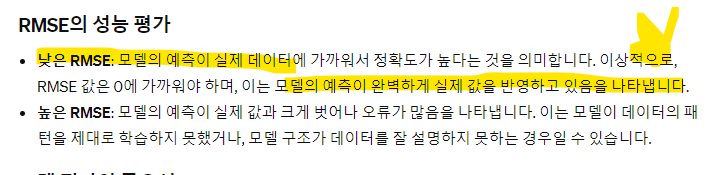

a.ipynb에서 작성한것은 주로 데이터 전처리 과정이 좀더 많고
결정 트리 기반의 앙상블 머신러닝 방법을 사용함 (시계열과 약간 연관성 없는 모델들)
이였다면

b에서는 시계열에 특화된 녀석들 사용